In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
import tqdm
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [10]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7484\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [20]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,1.0,Worst phone ever,Hang problem,25 February 2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022
...,...,...,...,...
4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022
4124,5.0,Over all best,Very Nice,22 June 2022
4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022
4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022


In [21]:
df.to_csv('P:\ExcelR_DS\Assignment DS\Text mini\Amazon_Reviews.csv')

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [4]:
# load the dataset
reviews=pd.read_csv('P:\ExcelR_DS\Assignment DS\Text mini\Amazon_Reviews.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1 January 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nSuperb Mind Blowing Awesom...,"Best, Superb, Mind Blowing, Awesome, Absolutel...",8 January 2024
3,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14 January 2024
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
...,...,...,...,...
10875,5.0,5.0 out of 5 stars\nGood,"Worth the money , works reall well",1 January 2024
10876,3.0,3.0 out of 5 stars\nOverall Performance,"Considering price of mobile, it is not as par ...",10 January 2024
10877,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
10878,4.0,4.0 out of 5 stars\nGood,Phone delivered in good condition. Satisfied. ...,25 December 2023


In [5]:
reviews.Rating.describe()

count    10880.000000
mean         4.297426
std          0.637805
min          3.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [6]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Performance:Awesome Product Quality:Exceeded e...,87
1,The media could not be loaded.\n ...,559
2,"Best, Superb, Mind Blowing, Awesome, Absolutel...",7
3,Best in class phone,4
4,"Ok , so this phone is good but not best in seg...",108


#### Number of characters

In [7]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Performance:Awesome Product Quality:Exceeded e...,552.0
1,The media could not be loaded.\n ...,2792.0
2,"Best, Superb, Mind Blowing, Awesome, Absolutel...",58.0
3,Best in class phone,19.0
4,"Ok , so this phone is good but not best in seg...",604.0


#### Average Word Length

In [8]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Performance:Awesome Product Quality:Exceeded e...,5.356322
1,The media could not be loaded.\n ...,4.133581
2,"Best, Superb, Mind Blowing, Awesome, Absolutel...",7.428571
3,Best in class phone,4.000000
4,"Ok , so this phone is good but not best in seg...",4.601852


#### Number of stopwords

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Performance:Awesome Product Quality:Exceeded e...,34
1,The media could not be loaded.\n ...,214
2,"Best, Superb, Mind Blowing, Awesome, Absolutel...",0
3,Best in class phone,1
4,"Ok , so this phone is good but not best in seg...",42


#### Number of special characters

In [10]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Performance:Awesome Product Quality:Exceeded e...,0
1,The media could not be loaded.\n ...,0
2,"Best, Superb, Mind Blowing, Awesome, Absolutel...",0
3,Best in class phone,0
4,"Ok , so this phone is good but not best in seg...",0


#### Number of numerics

In [11]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Performance:Awesome Product Quality:Exceeded e...,1
1,The media could not be loaded.\n ...,20
2,"Best, Superb, Mind Blowing, Awesome, Absolutel...",0
3,Best in class phone,0
4,"Ok , so this phone is good but not best in seg...",0


#### Number of Uppercase words

In [12]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Performance:Awesome Product Quality:Exceeded e...,2
1,The media could not be loaded.\n ...,8
2,"Best, Superb, Mind Blowing, Awesome, Absolutel...",0
3,Best in class phone,0
4,"Ok , so this phone is good but not best in seg...",0


In [13]:
reviews.head()

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1 January 2024,87,552.0,5.356322,34,0,1,2
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,559,2792.0,4.133581,214,0,20,8
2,5.0,5.0 out of 5 stars\nSuperb Mind Blowing Awesom...,"Best, Superb, Mind Blowing, Awesome, Absolutel...",8 January 2024,7,58.0,7.428571,0,0,0,0
3,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14 January 2024,4,19.0,4.000000,1,0,0,0
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023,108,604.0,4.601852,42,0,0,0


In [14]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','hashtags','upper'],axis=1,inplace=True)

In [15]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Performance:Awesome Product Quality:Exceeded e...
1    The media could not be loaded.\n              ...
2    West, Superb, Mind Flowing, Awesome, Absolutel...
3                                  West in class phone
4    K , so this phone is good but not best in segm...
Name: Review, dtype: object

In [16]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0         1
1        26
2         8
3        14
4        21
         ..
10875     1
10876    10
10877     1
10878    25
10879    10
Name: Review_Date, Length: 10880, dtype: object 
 0          January
1         February
2          January
3          January
4        September
           ...    
10875      January
10876      January
10877      October
10878     December
10879      January
Name: Review_Date, Length: 10880, dtype: object 
 0        2024
1        2022
2        2024
3        2024
4        2023
         ... 
10875    2024
10876    2024
10877    2023
10878    2023
10879    2024
Name: Review_Date, Length: 10880, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [17]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,1,January,2024
1,26,February,2022
2,8,January,2024
3,14,January,2024
4,21,September,2023
...,...,...,...
10875,1,January,2024
10876,10,January,2024
10877,1,October,2023
10878,25,December,2023


In [18]:
df.Month.value_counts()

January      6476
December     1148
October      1092
February     1056
September    1052
November       56
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [19]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,January
1,2
2,January
3,January
4,September
...,...
10875,January
10876,January
10877,October
10878,December


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10880 non-null  float64
 1   Title        10880 non-null  object 
 2   Review       10872 non-null  object 
 3   Review_Date  10880 non-null  object 
 4   Date         10880 non-null  object 
 5   Month        10880 non-null  object 
 6   Year         10880 non-null  object 
dtypes: float64(1), object(6)
memory usage: 595.1+ KB


In [21]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10880 non-null  float64
 1   Title        10880 non-null  object 
 2   Review       10872 non-null  object 
 3   Review_Date  10880 non-null  object 
 4   Date         10880 non-null  int64  
 5   Month        10880 non-null  object 
 6   Year         10880 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 595.1+ KB


### Dropping the Original Columns after splitting the data

In [22]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1,January,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26,2,2022
2,5.0,5.0 out of 5 stars\nSuperb Mind Blowing Awesom...,"Best, Superb, Mind Blowing, Awesome, Absolutel...",8,January,2024
3,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14,January,2024
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21,September,2023


In [23]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1 January 2024,1,January,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,26,February,2022
2,5.0,5.0 out of 5 stars\nSuperb Mind Blowing Awesom...,"Best, Superb, Mind Blowing, Awesome, Absolutel...",8 January 2024,8,January,2024
3,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14 January 2024,14,January,2024
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023,21,September,2023
...,...,...,...,...,...,...,...
10875,5.0,5.0 out of 5 stars\nGood,"Worth the money , works reall well",1 January 2024,1,January,2024
10876,3.0,3.0 out of 5 stars\nOverall Performance,"Considering price of mobile, it is not as par ...",10 January 2024,10,January,2024
10877,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023,1,October,2023
10878,4.0,4.0 out of 5 stars\nGood,Phone delivered in good condition. Satisfied. ...,25 December 2023,25,December,2023


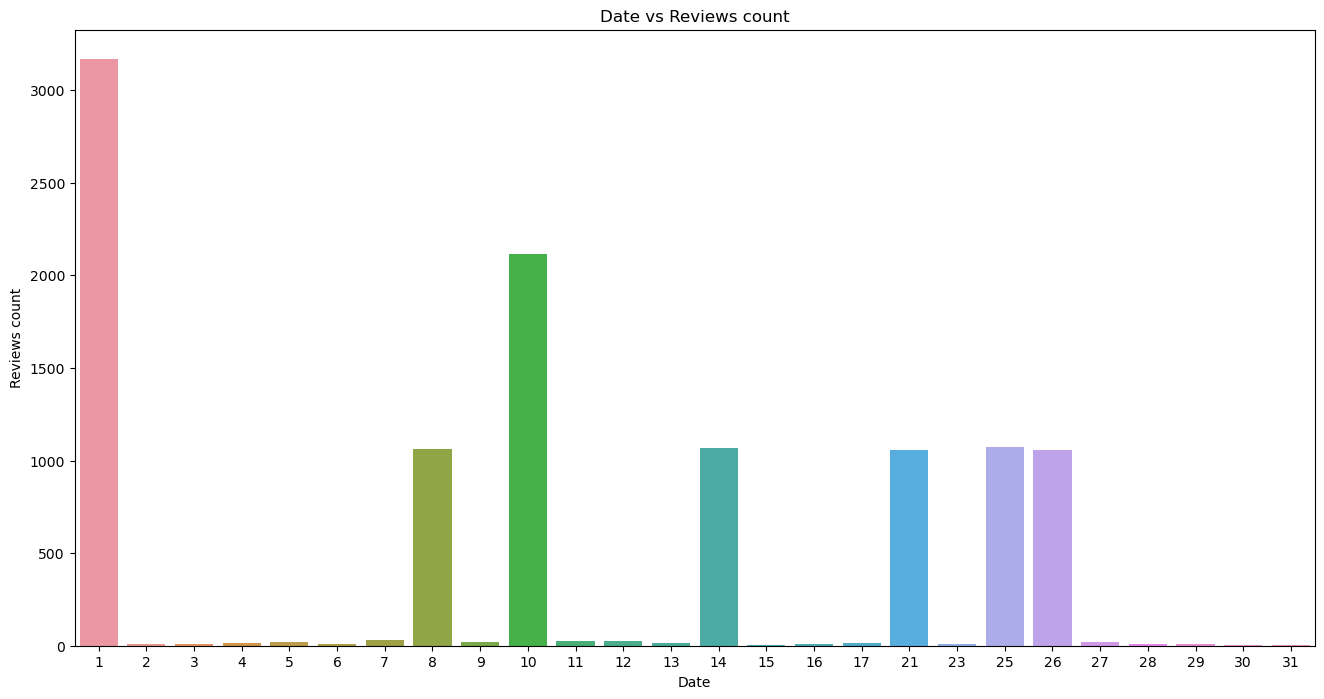

In [24]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

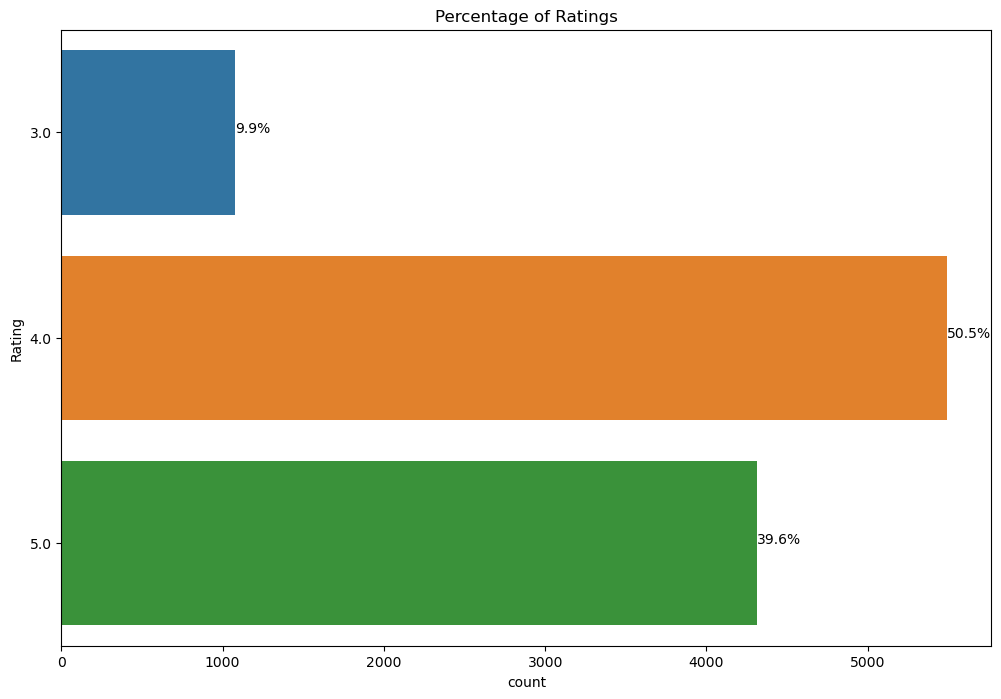

In [25]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [27]:
data = df[['Review']]
data

,Review
0,Performance:Awesome Product Quality:Exceeded e...
1,The media could not be loaded.\n ...
2,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,Best in class phone
4,"Ok , so this phone is good but not best in seg..."
...,...
10875,"Worth the money , works reall well"
10876,"Considering price of mobile, it is not as par ..."
10877,Very good and Stylish phone as compared to oth...
10878,Phone delivered in good condition. Satisfied. ...


In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [29]:
data

,Review
0,performance:awesome product quality:exceeded e...
1,the media could loaded. build quality - rating...
2,"best, superb, mind blowing, awesome, absolutel..."
3,best class phone
4,"ok , phone good best segment, encounter minor ..."
...,...
10875,"worth money , works reall well"
10876,"considering price mobile, par market, feature ..."
10877,very good stylish phone compared phones functi...
10878,phone delivered good condition. satisfied. i f...


In [30]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10880 [00:00<?, ?it/s]

In [31]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."


In [32]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [33]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,worth money work reall well,"Worth the money , works reall well"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...


In [34]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,worth money work reall well,"Worth the money , works reall well"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...


In [35]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,worth money work reall well,"Worth the money , works reall well"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...


In [36]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,worth money work reall well,"Worth the money , works reall well"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...


In [37]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,worth money work reall well,"Worth the money , works reall well"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...


In [38]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [39]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,worth money work reall well,"Worth the money , works reall well"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...


In [40]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [41]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel..."
3,best class phone,Best in class phone
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,worth money work reall well,"Worth the money , works reall well"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...


In [42]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,"[performance, awesome, product, quality, excee..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel...","[best, superb, mind, blowing, awesome, absolut..."
3,best class phone,Best in class phone,"[best, class, phone]"
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...","[ok, phone, good, best, segment, encounter, mi..."
5,worth money work reall well,"Worth the money , works reall well","[worth, money, work, reall, well]"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ...","[considering, price, mobile, par, market, feat..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,"[good, stylish, phone, compared, phone, functi..."
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...,"[phone, delivered, good, condition, satisfied,..."
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...,"[definitely, need, homework, purchasing, mobil..."


In [85]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [43]:
import codecs
with codecs.open("P:\ExcelR_DS\Assignment DS\Text mini/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [44]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [45]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,"[performance, awesome, product, quality, excee..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel...","[best, superb, mind, blowing, awesome, absolut..."
3,best class phone,Best in class phone,"[best, class, phone]"
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...","[ok, phone, good, best, segment, encounter, mi..."
5,worth money work reall well,"Worth the money , works reall well","[worth, money, work, reall, well]"
6,considering price mobile par market feature wi...,"Considering price of mobile, it is not as par ...","[considering, price, mobile, par, market, feat..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,"[good, stylish, phone, compared, phone, functi..."
8,phone delivered good condition satisfied forma...,Phone delivered in good condition. Satisfied. ...,"[phone, delivered, good, condition, satisfied,..."
9,definitely need homework purchasing mobile ama...,definitely you need to do homework before purc...,"[definitely, need, homework, purchasing, mobil..."


In [46]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [47]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [performance, awesome, product, quality, excee...
1    [medium, could, loaded, build, quality, rating...
2    [best, superb, mind, blowing, awesome, absolut...
3                                 [best, class, phone]
4    [ok, phone, good, best, segment, encounter, mi...
5                    [worth, money, work, reall, well]
6    [considering, price, mobile, par, market, feat...
7    [good, stylish, phone, compared, phone, functi...
8    [phone, delivered, good, condition, satisfied,...
9    [definitely, need, homework, purchasing, mobil...
Name: Clean_Reviews, dtype: object

In [48]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [49]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,perform awesom product qualiti exceed expect b...
1,medium could load build qualiti rate one light...
2,best superb mind blow awesom absolut beauti
3,best class phone
4,ok phone good best segment encount minor bug l...
...,...
10867,worth money work reall well
10868,consid price mobil par market featur wise alth...
10869,good stylish phone compar phone function like ...
10870,phone deliv good condit satisfi format phone k...


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [51]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


,stemmed
0,performance awesome product quality exceeded e...
1,medium could loaded build quality rating one l...
2,best superb mind blowing awesome absolutely be...
3,best class phone
4,ok phone good best segment encounter minor bug...
...,...
10867,worth money work reall well
10868,considering price mobile par market feature wi...
10869,good stylish phone compared phone function lik...
10870,phone delivered good condition satisfied forma...


In [ ]:
#print(cv.vocabulary_)

In [53]:
print(cv.get_feature_names_out()[109:200])

['colour' 'come' 'comfertble' 'comfort' 'comfortable' 'compact'
 'comparatively' 'compared' 'compass' 'competition' 'complained'
 'complaining' 'con' 'conclude' 'condition' 'configuration' 'connectivity'
 'connects' 'considering' 'consumes' 'could' 'country' 'cover' 'crash'
 'crashing' 'customer' 'damaged' 'dark' 'day' 'decent' 'decide'
 'definitely' 'degree' 'delete' 'delivered' 'delivery' 'design' 'device'
 'dimensity' 'disabled' 'disappointed' 'display' 'done' 'donno' 'doubt'
 'drain' 'drop' 'due' 'dum' 'durability' 'early' 'easily' 'easy' 'edge'
 'edit' 'ek' 'emi' 'encounter' 'end' 'enough' 'equal' 'even' 'ever'
 'everage' 'everything' 'exceeded' 'excellent' 'exchange' 'excluding'
 'expandable' 'expect' 'expectation' 'expected' 'expecting' 'experience'
 'exposure' 'facebook' 'facing' 'fact' 'famous' 'far' 'fast'
 'fastspeakers' 'father' 'fav' 'feature' 'featured' 'feb' 'feel'
 'festival' 'file']


In [54]:
print(cv.get_feature_names_out()[:100])

['aa' 'aap' 'aati' 'able' 'absolutely' 'acha' 'achcha' 'achchi'
 'achievable' 'achieve' 'acording' 'ad' 'adapter' 'adjust' 'afterwards'
 'almost' 'also' 'although' 'always' 'amazing' 'amazon' 'amoled' 'android'
 'angle' 'anyways' 'apne' 'app' 'applied' 'approximately' 'apps' 'around'
 'asked' 'atleast' 'attache' 'aur' 'average' 'avoided' 'awesome' 'ba'
 'back' 'background' 'backup' 'bad' 'baki' 'band' 'based' 'basic'
 'battery' 'baught' 'bdiya' 'beautiful' 'becomes' 'believe' 'best'
 'bestbattery' 'better' 'bezel' 'bgmi' 'bhi' 'bhut' 'biggest' 'bit'
 'bloat' 'bloatwares' 'blowing' 'blue' 'blurred' 'body' 'bottom' 'bought'
 'brand' 'brightness' 'browse' 'budget' 'bug' 'buggier' 'build' 'built'
 'busy' 'button' 'buy' 'cam' 'camera' 'canera' 'care' 'case' 'casted' 'ce'
 'chala' 'chalana' 'challenge' 'change' 'changing' 'charge' 'charger'
 'charging' 'chat' 'cheap' 'check' 'chin']


In [55]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10872 [00:00<?, ?it/s]

In [57]:
corpus[3]

'best class phone'

In [58]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [59]:
X.shape

(10872, 3275)

In [61]:
cv.get_feature_names_out()[:20]

array(['aa', 'aa gya', 'aa gya tha', 'aap', 'aap set', 'aap set chang',
       'aati', 'aati jati', 'aati jati rhti', 'abl', 'abl buy',
       'abl buy phone', 'absolut', 'absolut beauti', 'acha',
       'acha comfort', 'acha comfort bhi', 'acha hai', 'acha hai lekin',
       'acha hai mene'], dtype=object)

In [62]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [64]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aa,aa gya,aa gya tha,aap,aap set,aap set chang,aati,aati jati,aati jati rhti,abl,...,year work,year work perfectli,youtub,youtub instagram,youtub instagram facebook,youtub video,youtub video test,yt,yt heat,yt heat issu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10869,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10872 [00:00<?, ?it/s]

In [66]:
corpus[4]

'ok phone good best segment encount minor bug like app crash idk happen perform quit good lag frame drop game like bgmi camera camera quit good make photo colour oversatur ultra wide len selfi camera good final review go get k keep mind display good get p yt heat issu batteri perform also good budget tight look brand valu go edit app crash problem fix updat'

In [67]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [68]:
X.shape

(10872, 3275)

In [69]:
tfidf_v.get_feature_names_out()[:20]

array(['aa', 'aa gya', 'aa gya tha', 'aap', 'aap set', 'aap set chang',
       'aati', 'aati jati', 'aati jati rhti', 'abl', 'abl buy',
       'abl buy phone', 'absolut', 'absolut beauti', 'acha',
       'acha comfort', 'acha comfort bhi', 'acha hai', 'acha hai lekin',
       'acha hai mene'], dtype=object)

In [70]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [71]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aa,aa gya,aa gya tha,aap,aap set,aap set chang,aati,aati jati,aati jati rhti,abl,...,year work,year work perfectli,youtub,youtub instagram,youtub instagram facebook,youtub video,youtub video test,yt,yt heat,yt heat issu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072075,0.072075,0.072075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
10868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
10869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
10870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [72]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'performance awesome product quality exceeded expectation best feature processor battery bought friend neighbor fone got damaged test week far mid range phone exceeded expectation get hot charging gaming plus battery life lasted day phone connects fast wirelessly lag even multitasking oneplus really surprised performance buy time opt high end flagship model medium could loaded build quality rating one light weight phone say quite comfortable one hand usage even material used polycarbonate get job done matter back cover term styling similar oppo phone liked recommend gray one attache fingerprint going use back cover matterdisplay rating really good amoled plan hz refresh rate work well wish could hz bottom chin quite thick thing yes gorilla glass protection screen guard pre applied panel one best pretty decent wellperformance rating dimensity ufs lppdr x ram get job done regular day day operation played game say considering soc pretty good expect fps stable bgmi cod still would say proc

In [73]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [74]:
for token in doc_block[:50]:
    print(token,token.pos_)  

performance NOUN
awesome ADJ
product NOUN
quality NOUN
exceeded VERB
expectation NOUN
best ADJ
feature NOUN
processor NOUN
battery NOUN
bought VERB
friend NOUN
neighbor PROPN
fone NOUN
got AUX
damaged VERB
test NOUN
week NOUN
far ADV
mid ADJ
range NOUN
phone NOUN
exceeded VERB
expectation NOUN
get VERB
hot ADJ
charging VERB
gaming NOUN
plus CCONJ
battery NOUN
life NOUN
lasted VERB
day NOUN
phone NOUN
connects VERB
fast ADV
wirelessly ADV
lag VERB
even ADV
multitasking VERB
oneplus NOUN
really ADV
surprised ADJ
performance NOUN
buy VERB
time NOUN
opt VERB
high ADJ
end NOUN
flagship NOUN


In [76]:
# Filtering the nouns and verbs only
one_block=reviews_text
nlp.max_length = 3755291
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['offering', 'decide', 'gaming', 'matter', 'year', 'based', 'oxygen', 'say', 'color', 'oos', 'bug', 'say', 'lot', 'wait', 'ideacamera', 'rating', 'mp', 'atleast', 'expecting', 'sensor', 'provided', 'omnivison', 'sensor', 'get', 'job', 'done', 'camera', 'check', 'review', 'video', 'p', 'mp', 'ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'brightness', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'rest', 'remaining', 'wifi', 'battery', 'task', 'day', 'charging', 'take', 'minute', 'charge', 'percent', 'fastspeakers', 'speaker', 'quality', 'quality', 'rating', 'none', 'party', 'complained', 'voice', 'getting', 'conclude', 'buy', 'care', 'oneplus', 'want', 'try', 'oneplus', 'time', 'getting', 'price', 'rejected', 'miui', 'user', 'want', 'software', 'ad', 'notification', 'bloatwares', 'superb', 'mind', 'blowing', 'class', 'phone', 'ok', 'phone', 'segment', 'encounter', 'bug']


In [77]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,21160
1,battery,7416
2,oneplus,7388
3,buy,7376
4,rating,6320
5,camera,5364
6,performance,5292
7,day,5280
8,get,5264
9,say,5264


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

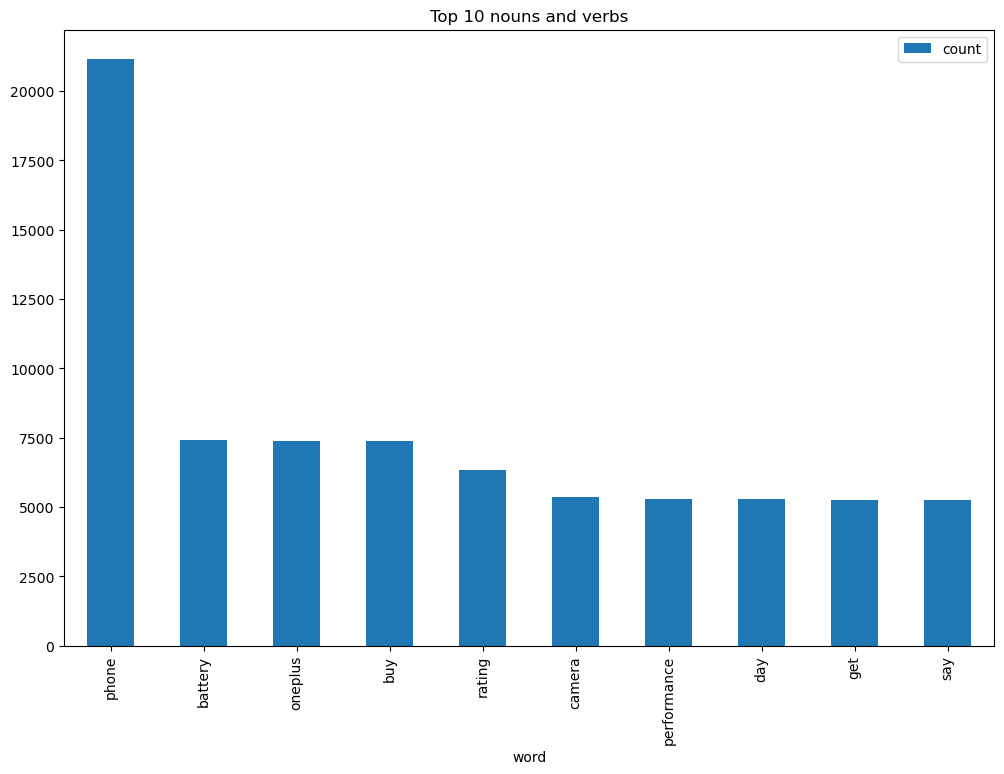

In [78]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [79]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [80]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [81]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,10868
neg,4


In [82]:
dataframe.Clean_Reviews[8]

'phone delivered good condition satisfied formatted phone kept ready exchange delivery person asked install amazon app verification receiving otp hence install app format phone delivery collecting phone go delivery person location busy delivery could avoided amazon'

In [83]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.055, 'neu': 0.682, 'pos': 0.264, 'compound': 0.802}

In [85]:
np.asarray(x).astype(np.float64)
sid.polarity_scores(x.Clean_Reviews[8])

AttributeError: 'numpy.float64' object has no attribute 'Clean_Reviews'

In [86]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,performance awesome product quality exceeded e...,"{'neg': 0.082, 'neu': 0.683, 'pos': 0.234, 'co..."
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co..."
2,best superb mind blowing awesome absolutely be...,"{'neg': 0.0, 'neu': 0.153, 'pos': 0.847, 'comp..."
3,best class phone,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
4,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co..."


In [87]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,performance awesome product quality exceeded e...,"{'neg': 0.082, 'neu': 0.683, 'pos': 0.234, 'co...",0.8687
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977
2,best superb mind blowing awesome absolutely be...,"{'neg': 0.0, 'neu': 0.153, 'pos': 0.847, 'comp...",0.9558
3,best class phone,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369
4,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co...",0.9619


In [88]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,performance awesome product quality exceeded e...,"{'neg': 0.082, 'neu': 0.683, 'pos': 0.234, 'co...",0.8687,Positive
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977,Positive
2,best superb mind blowing awesome absolutely be...,"{'neg': 0.0, 'neu': 0.153, 'pos': 0.847, 'comp...",0.9558,Positive
3,best class phone,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,Positive
4,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co...",0.9619,Positive
...,...,...,...,...
10867,worth money work reall well,"{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp...",0.4588,Positive
10868,considering price mobile par market feature wi...,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.7184,Positive
10869,good stylish phone compared phone function lik...,"{'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'co...",0.9612,Positive
10870,phone delivered good condition satisfied forma...,"{'neg': 0.055, 'neu': 0.682, 'pos': 0.264, 'co...",0.8020,Positive


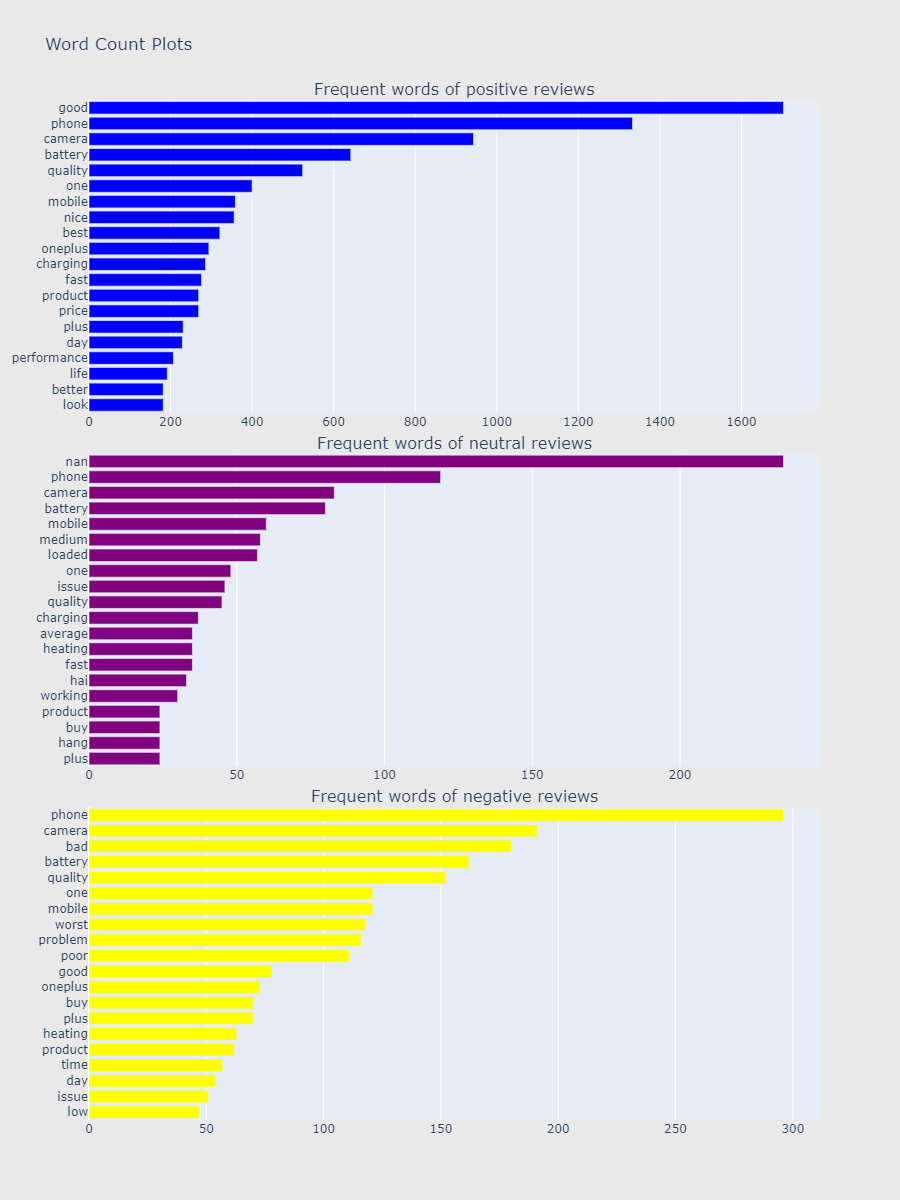

In [91]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,10828
1,Neutral,40
0,Negative,4


<Axes: xlabel='sentiment', ylabel='count'>

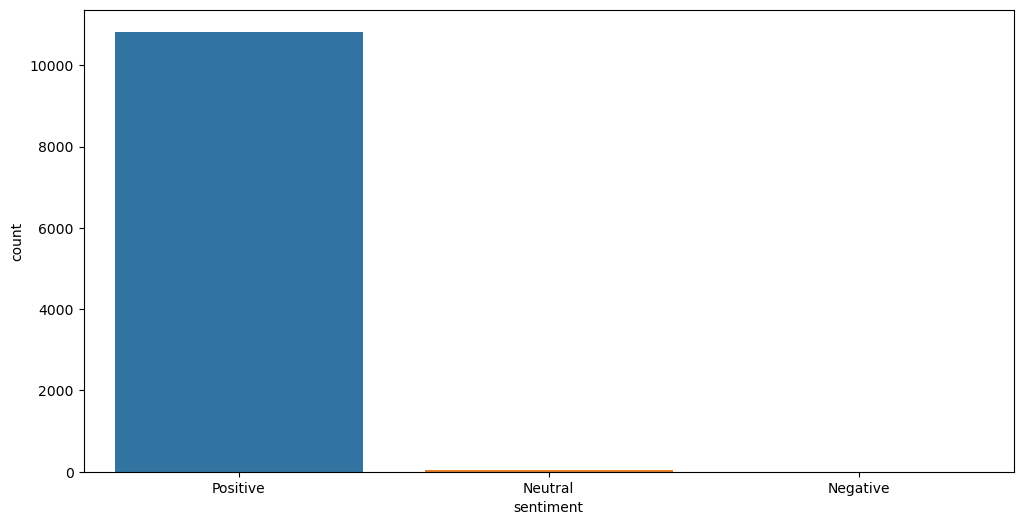

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [93]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,performance awesome product quality exceeded e...,51
1,medium could loaded build quality rating one l...,259
2,best superb mind blowing awesome absolutely be...,7
3,best class phone,3
4,ok phone good best segment encounter minor bug...,66


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

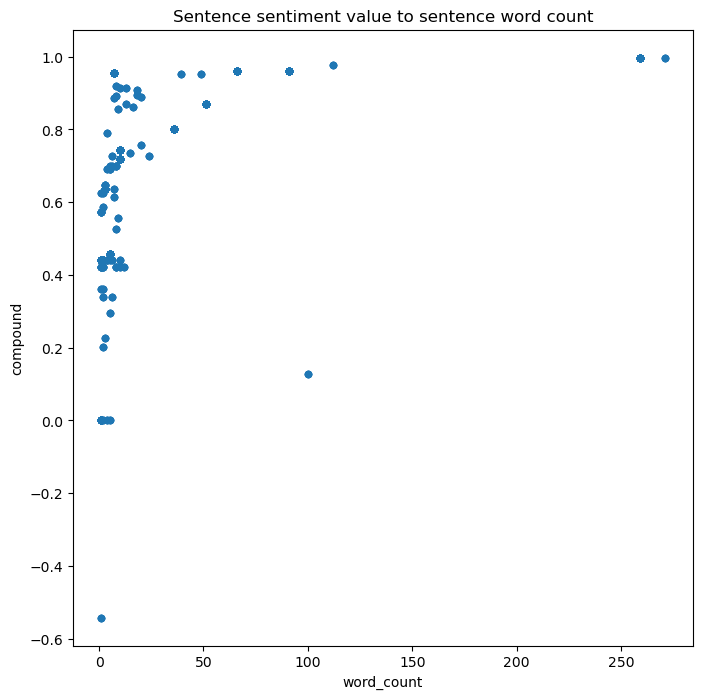

In [94]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [95]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,10860
neg,12


In [96]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets,Subjectivity,Polarity
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,"[performance, awesome, product, quality, excee...",0.648750,0.351250
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating...",0.512212,0.213783
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel...","[best, superb, mind, blowing, awesome, absolut...",0.825000,0.962500
3,best class phone,Best in class phone,"[best, class, phone]",0.300000,1.000000
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...","[ok, phone, good, best, segment, encounter, mi...",0.491837,0.362245


Text(0, 0.5, 'Subjectivity')

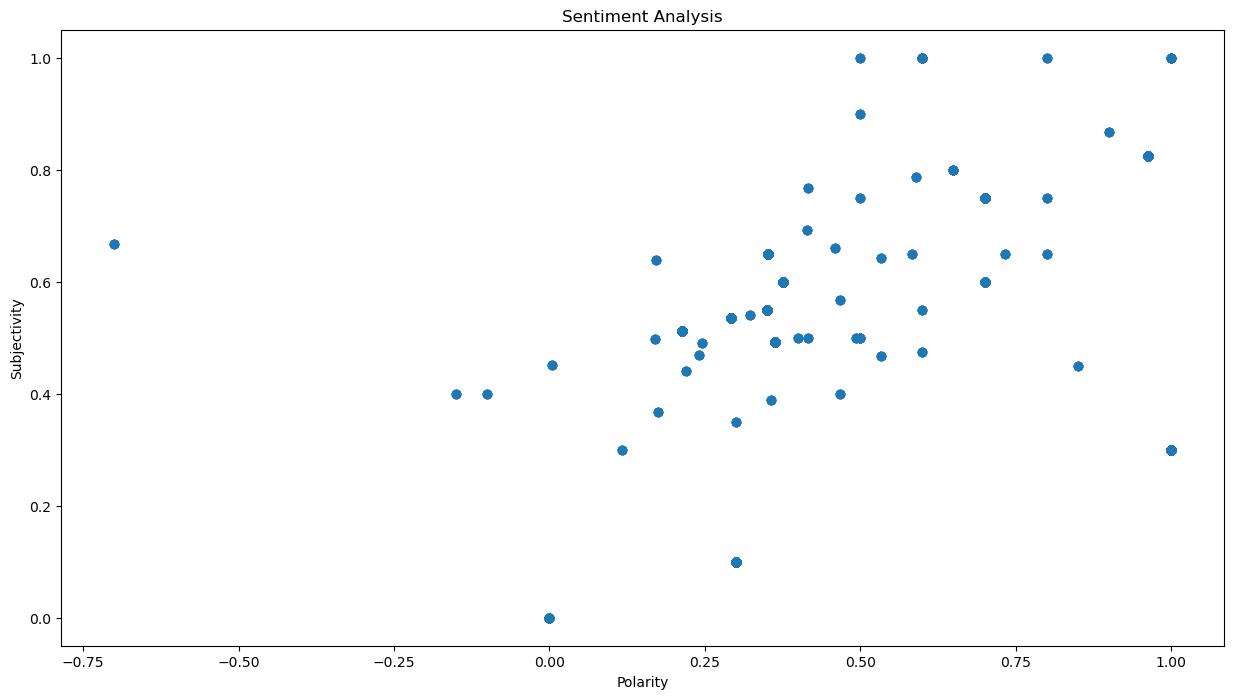

In [97]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [98]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [100]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("P:\ExcelR_DS\Assignment DS\Text mini/clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets,Subjectivity,Polarity,sentiment
0,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,"[performance, awesome, product, quality, excee...",0.648750,0.351250,pos
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating...",0.512212,0.213783,pos
2,best superb mind blowing awesome absolutely be...,"Best, Superb, Mind Blowing, Awesome, Absolutel...","[best, superb, mind, blowing, awesome, absolut...",0.825000,0.962500,pos
3,best class phone,Best in class phone,"[best, class, phone]",0.300000,1.000000,pos
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...","[ok, phone, good, best, segment, encounter, mi...",0.491837,0.362245,pos


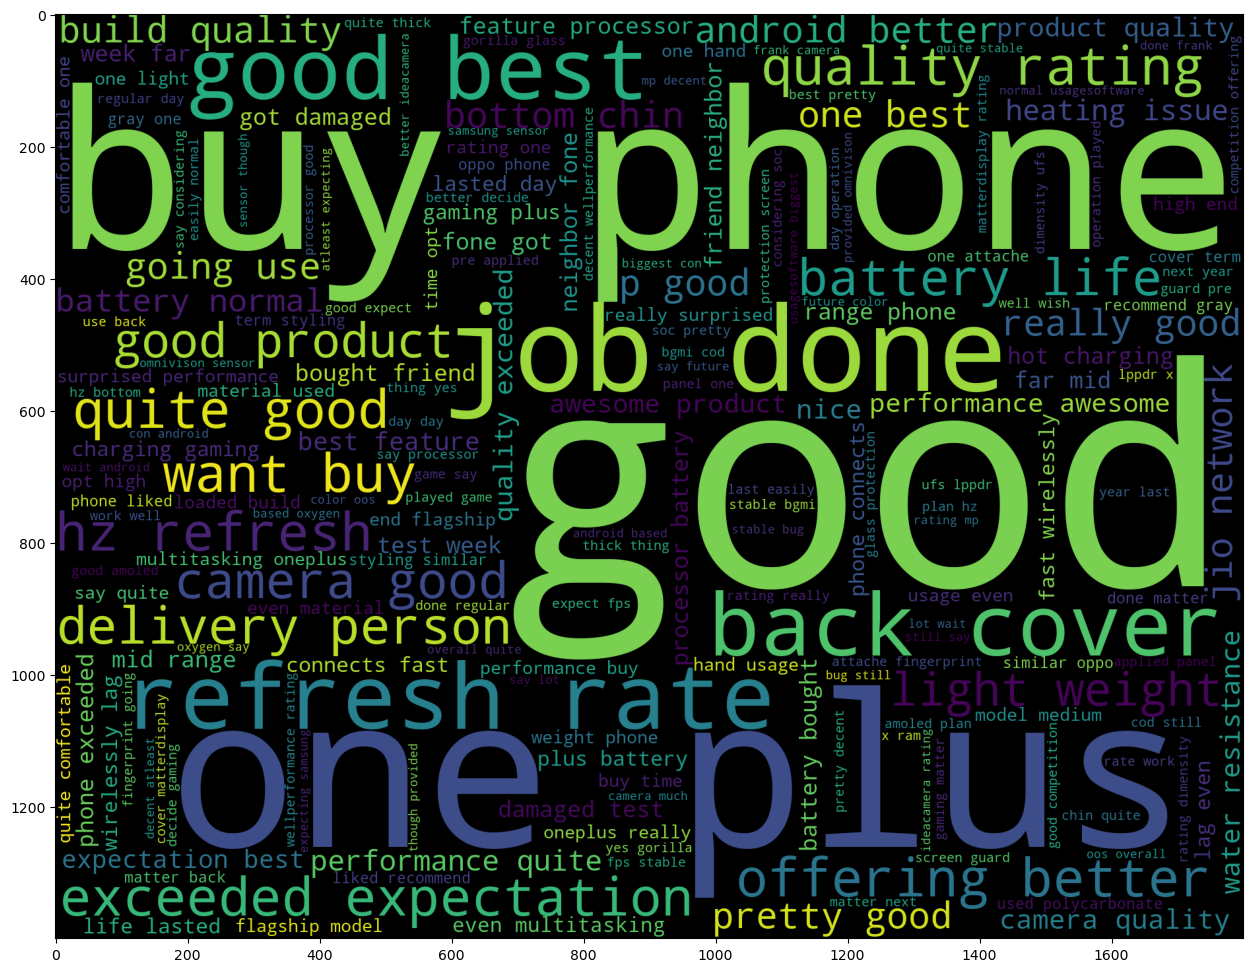

In [101]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [102]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

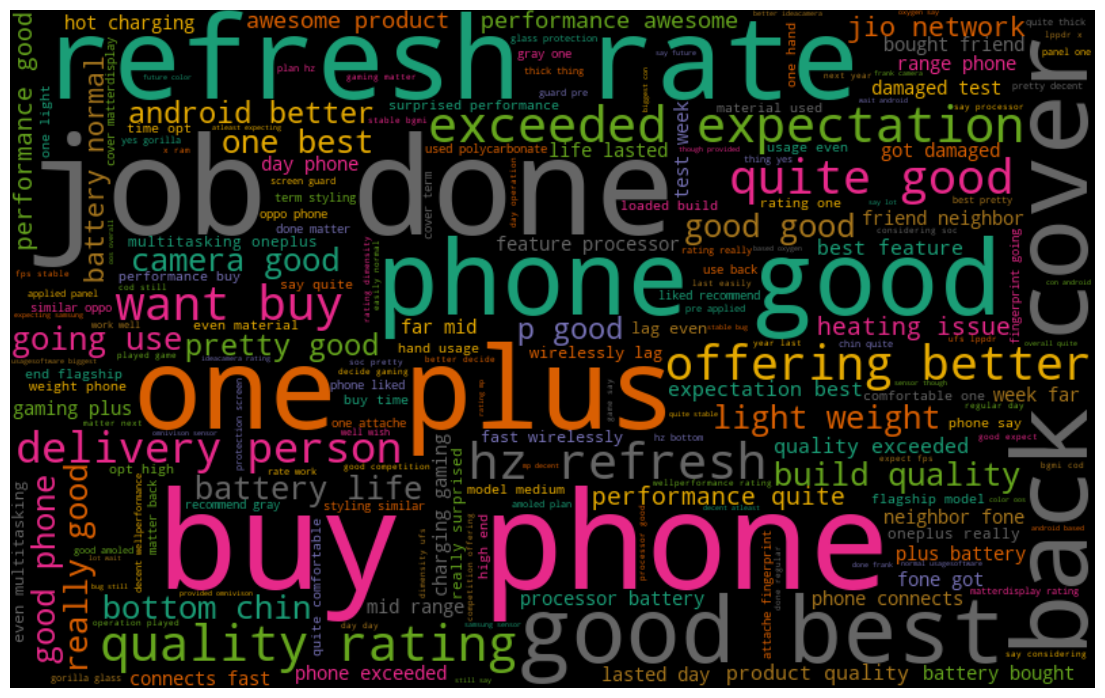

In [103]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

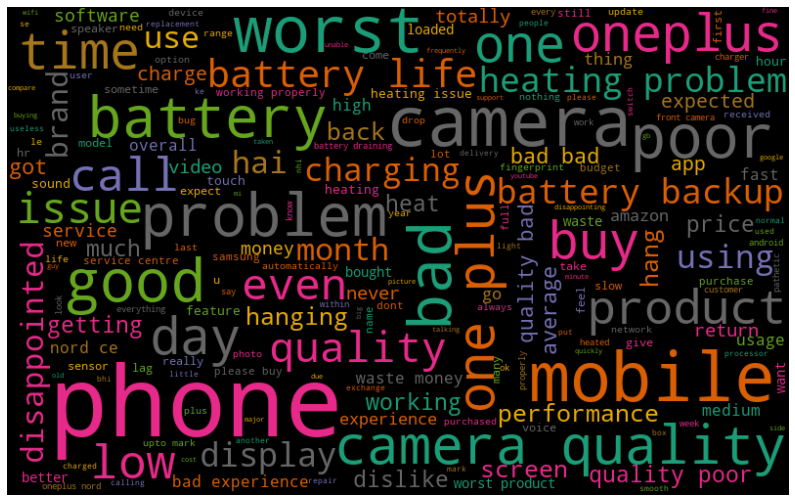

In [263]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)